# `DSML_WS_04` - Introduction to Visualization with Matplotlib and Seaborn

In this tutorial we will continue with our introduction Python programming for data science. Today we will focus on **visualization**.

We will go through the following:

- **Introduction to visualization with `Matplotlib`**: Learn how you can use `Matplotlib` to porduce plots that effectively communicate your data
- **Advanced visualization in `Seaborn`**: Use `Seaborn`' for advanced visualization of complex relationships

## `Matplotlib`

Matplotlib is a multi-platform data visualization library built on NumPy arrays. It was originally designed as a patch to IPython for enabling interactive MATLAB-style plotting from the IPython command line. To those of you with experience in working with MATLAB some of the functionality and styles may therefore seem familiar, although syntax varies.

Matplotlib allows for abundant modification and personalization of graphs and plots which cannot all be covered in this tutorial. However, when working with the library the Matplotlib website can act as a powerful reference and source of inspiration. Please have a look [here](https://matplotlib.org/#installation).

Despite being one of the oldest  visualization libraries in Python, Matplotlib is still widely used and valued as a well proven, stable and easy to use tool. New add-ons building on the Matplotlib API and using largely the same code such as Seaborn have emerged which mainly exhibit slicker designs. These tools are for you to be checked out in your own time and are not part of this course.

Today we will show you:
* How to plot simple graphs
* How to modify the size, shape and design of your graph
* The different plot styles
* How to apply these on real data by working through an execise

Just as we use the __np__ shorthand for NumPy and the __pd__ shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting interactively within an IPython notebook can be done with the %matplotlib command, and works in a similar way to the IPython shell. In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:
* `%matplotlib notebook` will lead to interactive plots embedded within the notebook
* `%matplotlib inline` will lead to static images of your plot embedded in the notebook

For this book, we will generally opt for `%matplotlib inline`:

In [3]:
%matplotlib inline

### Plots and Sub Plots

We will illustrate the basic functionality of Matplotlib by plotting two simple exponential functions and a simple linear function (x, x^2 and x^3) as line plots.

#### Creating a single (line) plot

For defining the plot we use `plt.plot()`. The command `plt.show()` then starts an event loop by looking for all currently active figure objects, and opening one or more interactive windows that display your figure(s). 

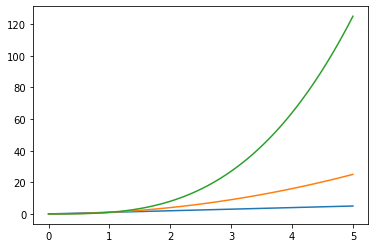

In [4]:
x = np.linspace(0, 5, 100)

y1=x
y2=x**2
y3=x**3

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.show()

#### Annotating and labelling plots
We can optimize the resulting plot in various ways, e.g.:

* Set a title: `plt.title('name')`
* Name the axes: `plt.xlabel('name')`, `plt.ylabel('name')`
* Include a legend: `plt.plot(lable="xx")` and `plt.legend()`

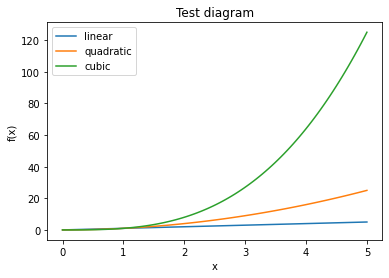

In [11]:

# Add labels to the plots (will show up in legend)
plt.plot(x, y1, label="linear")
plt.plot(x, y2, label="quadratic")
plt.plot(x, y3, label="cubic")

# Add diagram and axes titles
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Test diagram')

# Display legend
# Use loc function to choose optimal position of legend (loc=0 means Matplotlib chooses optimla position independently)

plt.legend(loc="upper left")

# Show plot
plt.show()

#### Creating multiple sub plots

Sometimes we may wish to see multiple sub-plots next to each other. For this `plt.subplot()`is a useful tool. We will demonstrate with a quick example.

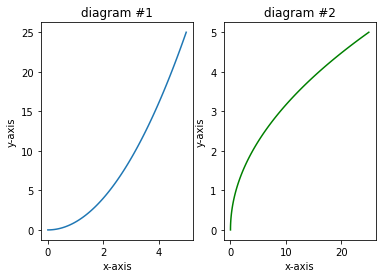

In [16]:
# plt.subplot syntax: (# of rows, # of columns, plot number)

# subplot no. 1
plt.subplot(1,2,1)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('diagram #1')
plt.plot(x, y2)

# subplot no. 2
plt.subplot(1,2,2)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('diagram #2')
plt.plot(y2, x, "g")

plt.show()

### Object-based plotting

Object-based plotting offers better control of your plot, particularly if you are working with multiple objects. While in the above examples the axes where created for us in the background, we have to define them here manually. While this might seem more complicated at first it offers better flexibility. For instance, we can add more than one axis.

For object-oriented Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:


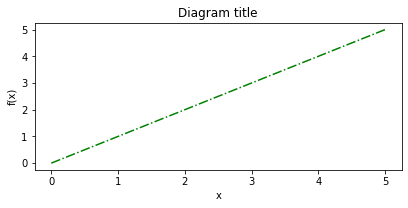

In [32]:
# Create a figure (empty work space)
Fig_1 = plt.figure(figsize=(10,4))

# Add axes to the figure
ax_1 = Fig_1.add_axes([0.5, 0.5, 0.51, 0.51])
ax_1.plot(x, y1, 'g-.')

# Add elements to axis

ax_1.set_xlabel('x') # Use set_ to start method
ax_1.set_ylabel('f(x)')
ax_1.set_title('Diagram title')


plt.savefig("Test_diagram.pdf")

plt.show()

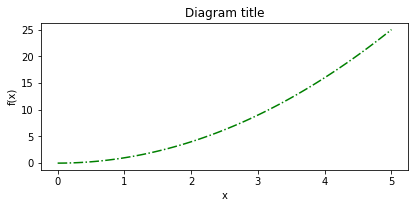

In [33]:
# Create a figure (empty work space)
Fig_1 = plt.figure(figsize=(10,4))

# Add axes to the figure
ax_1 = Fig_1.add_axes([0.5, 0.5, 0.51, 0.51])

# Onto these axes we can now plot and add labels
ax_1.plot(x, y2, 'g-.')
ax_1.set_xlabel('x') # Use set_ to start method
ax_1.set_ylabel('f(x)')
ax_1.set_title('Diagram title')

plt.show()

As mentioned above, one of the benefits of object-based Matplotlib plots is greater flexibility, e.g. by adding multiple axes.

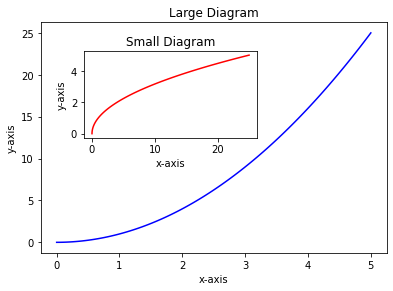

In [35]:
# empty work space
Fig_2 = plt.figure()

ax_2 = Fig_2.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax_3 = Fig_2.add_axes([0.2, 0.5, 0.4, 0.3]) # added axes

# Larger diagramm with axes 1
ax_2.plot(x, y2, 'b')
ax_2.set_xlabel('x-axis')
ax_2.set_ylabel('y-axis')
ax_2.set_title('Large Diagram')

# Larger diagramm with axes 2
ax_3.plot(y2, x, 'r')
ax_3.set_xlabel('x-axis')
ax_3.set_ylabel('y-axis')
ax_3.set_title('Small Diagram')

plt.show()

We can also use object-based plotting for subplots. Here is an example:

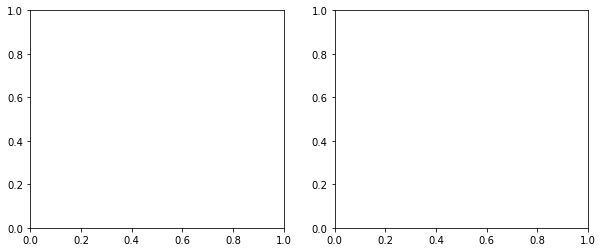

In [38]:
# instead of plt.figure() we use plt.subplots()
Fig_4, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (10,4))

# this will create an array
print(axes)

plt.show()

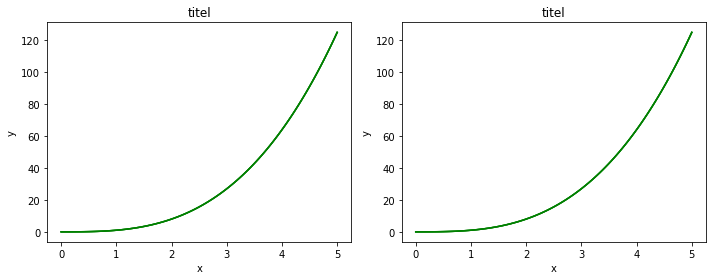

In [41]:
# we can interate through this aray to set the axes and plot onto them

for ax in axes:
    ax.plot(x, y3, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('titel')

# Display

Fig_4.tight_layout() # avoid overlapping

Fig_4

### Plot appearance

#### Modifying size and shape

Matplotlib allows us to set aspect ratio, DPI and diagram size. For this we use the `figsize` and `dpi` arguments.

* `figsize` is a Tupel of width and height in inch
* `dpi` means dots-per-inch

For example:

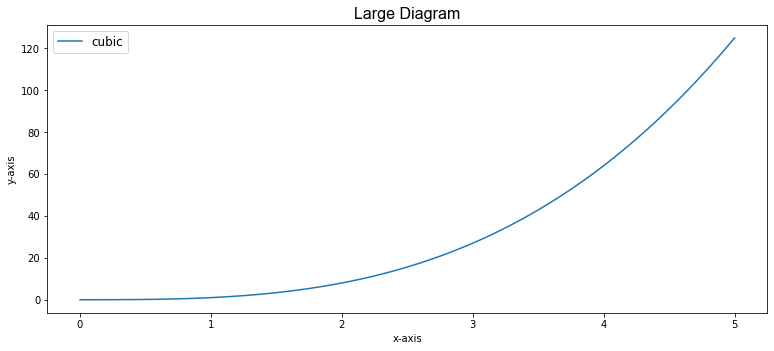

In [47]:
Fig_3 = plt.figure(figsize=(10,4))

ax = Fig_3.add_axes([0,0,1,1])

ax.plot(x,y3,label="cubic")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Large Diagram', fontsize=16, fontname="Arial")

plt.legend(loc=0, fontsize=12)

plt.show()

#### Defining diagram area

We can set diagram areas and axes with `set_ylim` and `set_xlim`. Alternatively you can use `axis("tight")` to autamatically create a fitted axis:

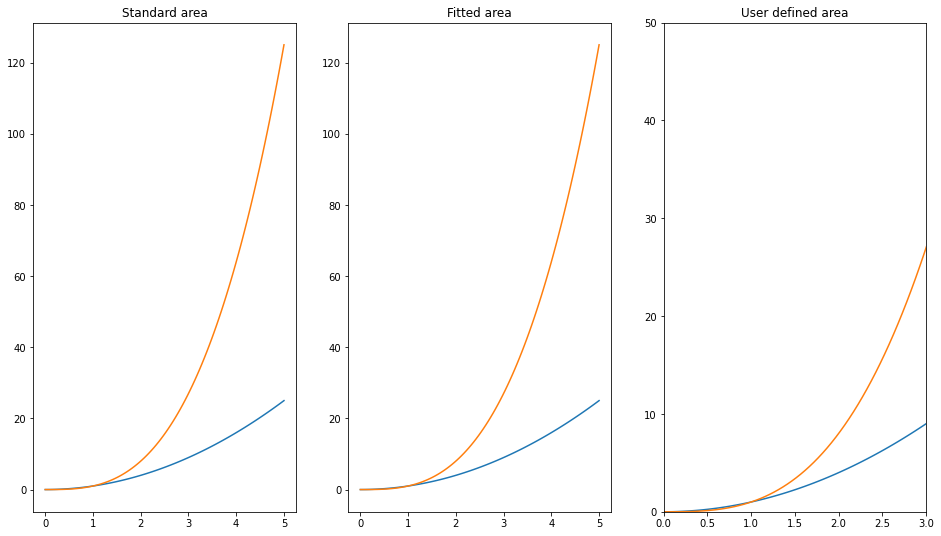

In [49]:
diag, axes = plt.subplots(1, 3, figsize=(16, 9))

axes[0].plot(x, y2, x, y3)
axes[0].set_title("Standard area")

axes[1].plot(x, y2, x, y3)
axes[1].axis('tight')
axes[1].set_title("Fitted area")

axes[2].plot(x, y2, x, y3)
axes[2].set_ylim([0, 50])
axes[2].set_xlim([0, 3])
axes[2].set_title("User defined area");

#### Modifying colour and style
We can manually adjust the appearance of the graph. For instance, we may:
* Set line colour
* Set line style

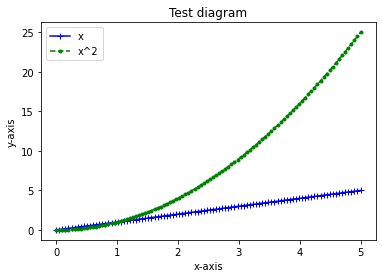

In [53]:
# Add labels to the plots (will show up in legend)
# Additionally add MatLab-style description 
plt.plot(x, y1,'b+-',label="x")
plt.plot(x, y2, 'g.--',label="x^2",)

# Add diagram and axes titles
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Test diagram')

# Display legend
# Use loc function to choose optimal position of legend (loc=0 means Matplotlib chooses optimla position independently)

plt.legend(loc=0)

# Show plot
plt.show()

A whole range of different design options exist. In the following we will show you a few. Please refer to the Matplotlib repository for a comprehensive overview of design options and styles.

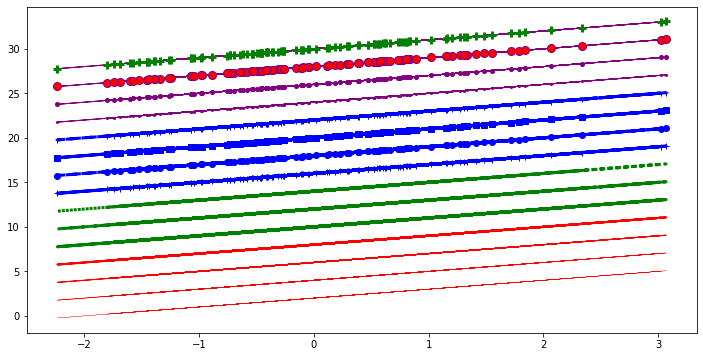

In [59]:
diag, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+2, color="red", linewidth=0.25)
ax.plot(x, x+4, color="red", linewidth=0.50)
ax.plot(x, x+6, color="red", linewidth=1.00)
ax.plot(x, x+8, color="red", linewidth=2.00)

# User-defined lines ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+10, color="green", lw=3, linestyle='-')
ax.plot(x, x+12, color="green", lw=3, ls='-.')
ax.plot(x, x+14, color="green", lw=3, ls=':')

# Possible markers: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+16, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+18, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+20, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+22, color="blue", lw=3, ls='--', marker='1')

# Marker size and colour
ax.plot(x, x+24, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+26, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+28, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+30, color="purple", lw=1, ls='-', marker='+', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green")

plt.savefig("Test.pdf")

plt.show()

### Other plot types

In addition to normal `plot` methods there are further arguments to produce various types of diagrams. A hollistic overview of diagram types can be viewed on the official Matplotlib website at: http://matplotlib.org/gallery.html

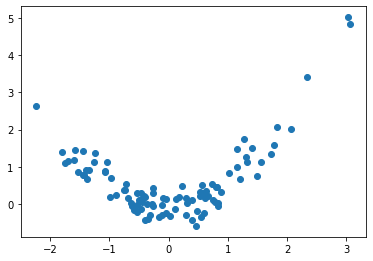

In [57]:
# scatter plots:
Scatter = plt.figure()
axscat = Scatter.add_axes([0.1, 0.1, 0.8, 0.8]) 

x = np.random.randn(100)
y = 0.5*x**2+0.3*np.random.randn(100)

axscat.scatter (x,y)
axscat.axis("tight")
plt.show()

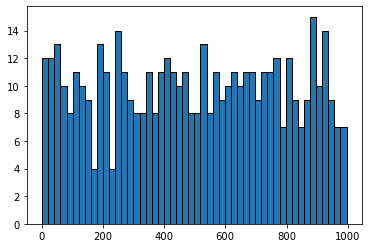

In [58]:
# histogram plots:

from random import sample
data = sample(range(1, 1000), 500)

plt.hist(data, bins=50, edgecolor='k')
plt.show()

### <font color='green'> Exercise - Visualizing `iris.csv` </font>

### *Task 1:* 

Read in the `iris.csv` dataset. Handle missing data. Create a simple scatter plot on the "Sepal.Width" feature. Annotate your graph and size it appropriately.



In [62]:
# YOUR CODE HERE. IF YOU ARE SEEING THE SAME AS BELOW, YOU CAN GO ON!

import pandas as pd

iris = pd.read_csv("iris.csv")
iris = iris.fillna(method="bfill")

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
# STEP 1 - DO NOT RUN THIS CELL, OTHERWISE THE OUTPUT IS LOST!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


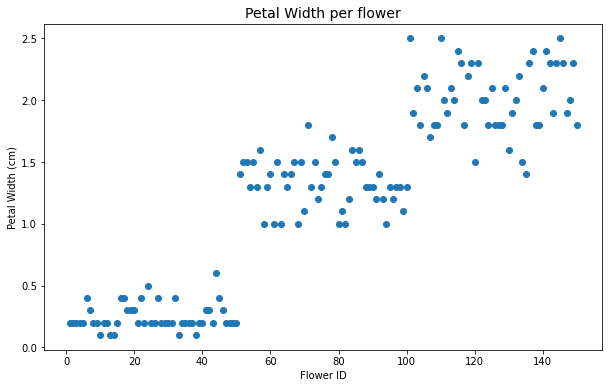

In [72]:
# YOUR CODE HERE. IF YOU ARE SEEING THE SAME AS BELOW, YOU CAN GO ON!

# first let's create a figure object

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# add scatter to axis

ax.scatter(iris["number"],iris["Petal.Width"])
ax.set_title("Petal Width per flower",fontsize=14)

ax.set_xlabel("Flower ID")
ax.set_ylabel("Petal Width (cm)")

plt.savefig("Petal_width_basic_plot.pdf")

plt.show()

In [73]:
# STEP 2 - DO NOT RUN THIS CELL, OTHERWISE THE OUTPUT IS LOST!

### *Task 2:*

You may have noticed some striking patterns emerging from this first plot. So let's dig deeper. Plot Petal.Width vs. Petal.Length on a scatter plot. Colour-code the differet species. Hint: Run `plt.scatter()` commands for each species. Use methods you know to differentieate between the species.

In [77]:
for species in list(iris["Species"].unique()):
    print(species)

setosa
versicolor
virginica


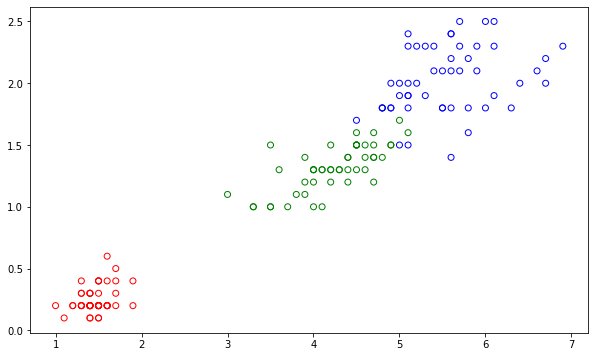

In [79]:
# YOUR CODE HERE

species = list(iris["Species"].unique())
colors = ["r","g","b"]

#create fig object

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# add to fig object in iterative fashion

for c,spec in enumerate(species):
    
    ### PLOTTING ROUTINE
    plt.scatter(x = iris[iris["Species"]==spec]["Petal.Length"],
               y= iris[iris["Species"]==spec]["Petal.Width"],
               edgecolor = colors[c],
               color="none",
               label=spec)
    
    
### Plot appearance


    








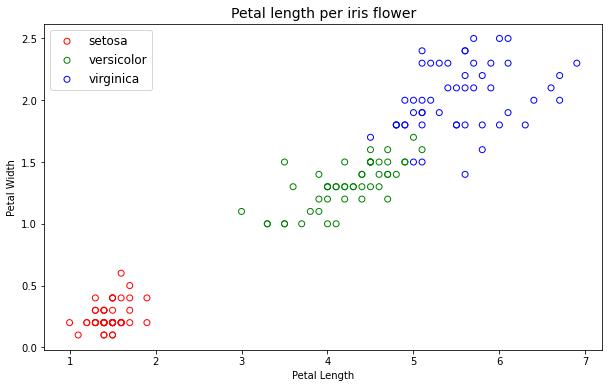

In [64]:
# DO NOT RUN THIS CELL, OTHERWISE THE OUTPUT IS LOST!

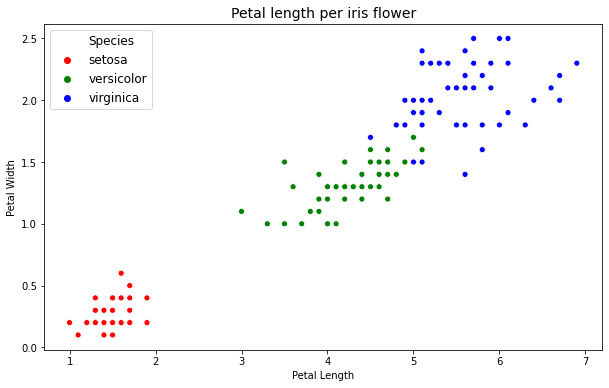

In [80]:
# and much easier with searborn...

import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (10,6))

# use the seaborn hue statement to differentiate the different species
sns.scatterplot(ax=ax, x="Petal.Length", y="Petal.Width", 
                data = iris, hue="Species", palette=colors)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal length per iris flower", fontsize=14)
ax.legend(fontsize=12)

plt.show()

### *Task 3:*

Finally let us plot a histogram, a common plot-type in data science, which shows the number of occurences of a given observation in the sample. Use Petal.Width for illustrtation purposes. 

Hint: Use `histtype='barstacked'` for this plot type. To plot the data, create a list of petal widths for each species which you append into one list and pass as `x` to `plt.hist()`.

In [81]:
# YOUR CODE HERE. IF YOU ARE SEEING THE SAME AS BELOW, YOU CAN GO ON!










In [82]:
# DO NOT RUN THIS CELL, OTHERWISE THE OUTPUT IS LOST

## `Seaborn`

Seaborn is a library for making statistical graphics in Python. It is built on top of `Matplotlib` and closely integrated with `Pandas` data structures. It provides a high-level interface for drawing attractive and informative statistical graphics. As such it is often easier to code than pure matplotlib graphs and often results in visually more appealing graphics. Plotting options are very comprehensive. An overview of plots types and styles can be found [here](https://seaborn.pydata.org/introduction.html). In this short introduction we will briefly introduce:
- Categorical plots (barplots, countplots, boxplots, violin plots, etc. )
- Grid plots
- Distibution plots

### Categorical plots

In [83]:
import seaborn as sns

In [84]:
# We import a new dataset, which is built into seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Barplots & Countplots

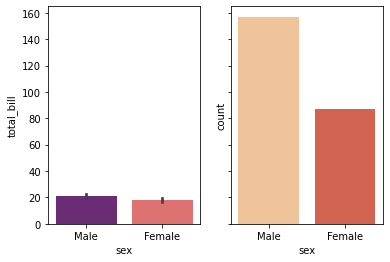

In [86]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

#barplots
sns.barplot(x="sex",y="total_bill",data=tips, ax=axes[0],palette="magma")

#countplots
sns.countplot(x="sex",data=tips, ax=axes[1],palette="OrRd")

plt.show()

#### Box and Whisker plots

Boxplots graphically depict groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

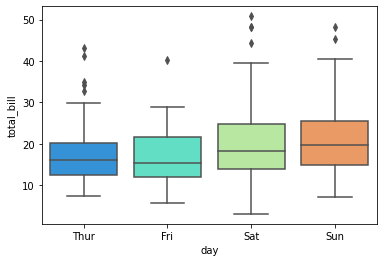

In [40]:
sns.boxplot(x="day",y="total_bill",data=tips,palette="rainbow")
plt.show()

The `hue` statemtem allows for categorical splitting of the data - A useful technique

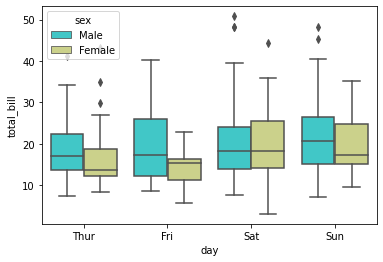

In [88]:
sns.boxplot(x="day",y="total_bill",data=tips,palette="rainbow", hue="sex")
plt.show()

#### Violine plots

Boxplots graphically depict groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

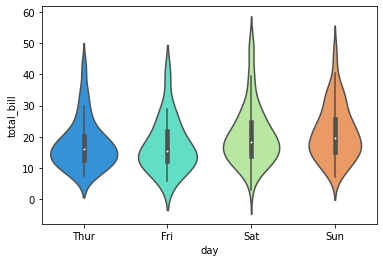

In [89]:
sns.violinplot(x="day", y="total_bill", data=tips, palette="rainbow")
plt.show()

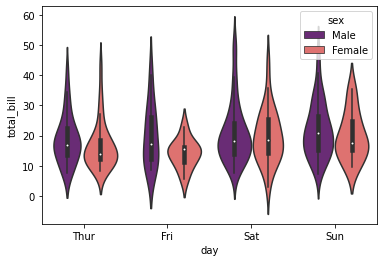

In [91]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex",palette="magma")
plt.show()

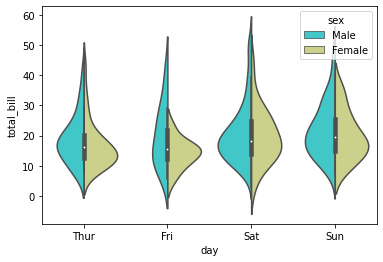

In [92]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',
               split=True,palette="rainbow")
plt.show()

### Distribution plots

#### Histograms

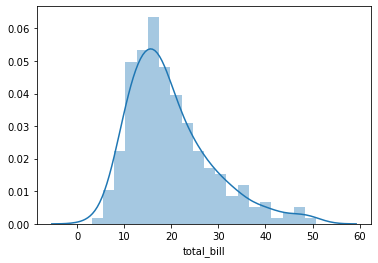

In [93]:
sns.distplot(tips["total_bill"], bins=20, kde=True)
plt.show()

#### Jointplots (multiple distributions)

Jointplots are excellent tools for plotting bivariate relationships

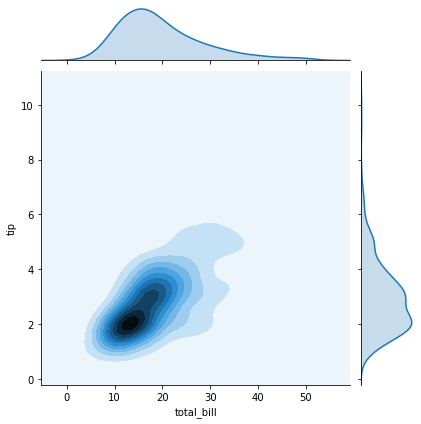

In [97]:
sns.jointplot(x="total_bill",y="tip",data=tips,
              kind="kde")
plt.show()

### <font color='green'> **Exercise**: Play around with the `kind=` parameter on a `seaborn.jointplot` and see for yourself:</font>

In [98]:
# YOUR CODE HERE










### Grid plots

Grids plots allow for the reperesentation of multiple relationships along rows and columns. This is a great tool for uncovering hidden relationships in your data.

#### Pairplots

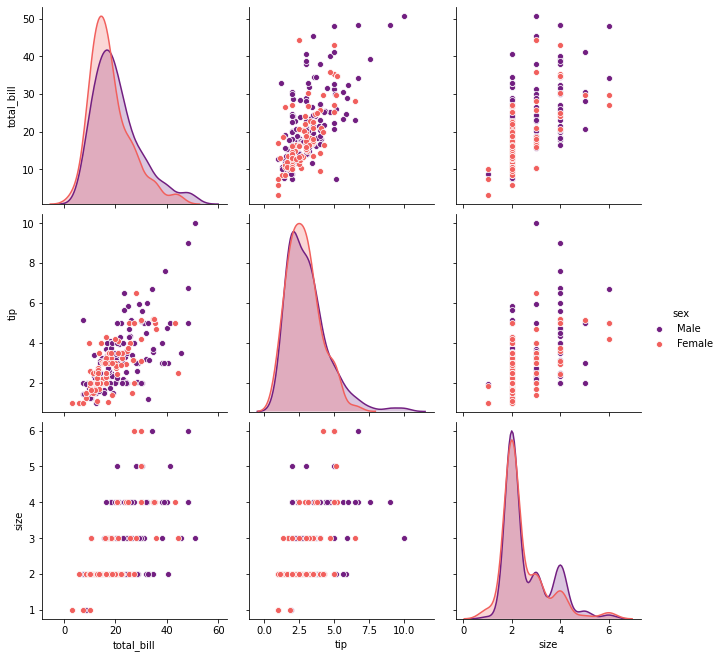

In [102]:
sns.pairplot(tips, palette="magma", height=3, hue="sex")
plt.show()

### <font color='green'> **Exercise**: Repeat some of the above `seaborn` visualizations for the iris dataset for partice. Which new reationships do you uncover? </font>

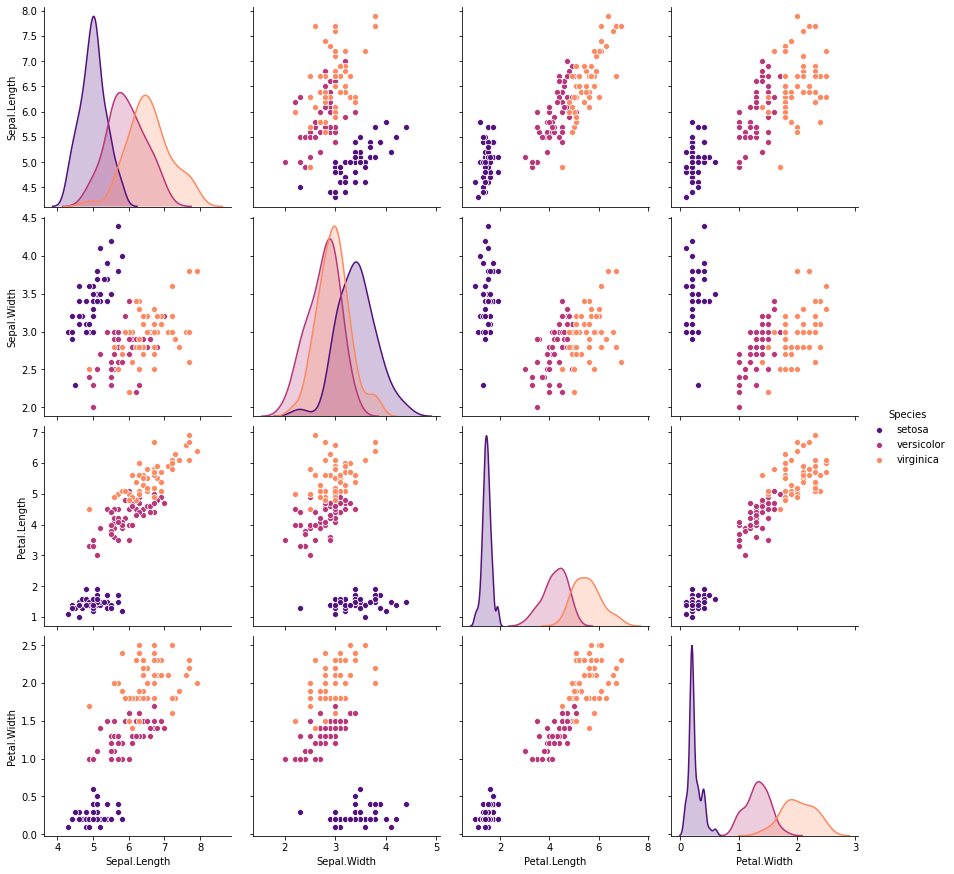

In [104]:
# YOUR CODE HERE

sns.pairplot(iris.drop("number",axis=1), palette="magma", height=3, hue="Species")
plt.show()







---